# this is for phase 4 and 5

In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Nirjala
import os
import pandas as pd
#import kagglehub

# Download the dataset
path = r"/Users/nirjalagurung/fraud"
# List all files in the downloaded directory
print("Files in dataset directory:", os.listdir(path))

# Load the CSV file (assuming it is named fraudTest.csv in the downloaded files)
csv_path = os.path.join(path, "fraudTest.csv")
df = pd.read_csv(csv_path)

# Display the DataFrame
print(df.head())

In [ ]:
#Spandana runs this <using fraudTrain>
import os
import pandas as pd
#import kagglehub

# Download the dataset
path = r"C:\Users\Thinking1\vsc_workspace\FDS"

# List all files in the downloaded directory
print("Files in dataset directory:", os.listdir(path))

# Load the CSV file (assuming it is named fraudTest.csv in the downloaded files)
csv_path = os.path.join(path, "fraudTrain.csv")
df = pd.read_csv(csv_path)

# Display the DataFrame
print(df.head())

In [36]:
import os
import pandas as pd
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("kartik2112/fraud-detection")
print("Path to dataset files:", path)

# List all files in the downloaded directory
print("Files in dataset directory:", os.listdir(path))

# Load the CSV file (assuming it is named fraudTest.csv in the downloaded files)
csv_path = os.path.join(path, "fraudTest.csv")
df = pd.read_csv(csv_path)

# Display the DataFrame
print(df.head())

Path to dataset files: /Users/sumeyahussein/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1
Files in dataset directory: ['fraudTrain.csv', 'fraudTest.csv']
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                      

In [40]:
#encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
#df = pd.read_csv("fraudTrain.csv")

# Drop only the specified columns that should not be processed
drop_columns = ['first', 'last', 'dob', 'trans_num']
df = df.drop(columns=drop_columns, errors='ignore')

# List the categorical columns that need to be processed (manually given in the problem)
categorical_columns = ['trans_date_trans_time', 'merchant', 'category', 'street', 'city', 'state', 'job']

# Print the categorical columns to confirm
print("Categorical columns to be processed:")
print(categorical_columns)

# Check cardinality
# Calculate the number of unique values for each categorical column
cardinality = df[categorical_columns].nunique()

# Separate columns based on their cardinality
high_cardinality = cardinality[cardinality > 50].index
low_cardinality = cardinality[cardinality <= 50].index

# Print identified columns
print("\nHigh cardinality columns (more than 50 unique values):")
print(high_cardinality.tolist())
print("\nLow cardinality columns (50 or fewer unique values):")
print(low_cardinality.tolist())

# Apply label encoding for high-cardinality columns
label_encoder = LabelEncoder()
for col in high_cardinality:
    print(f"Applying label encoding to high cardinality column: {col}")
    df[col] = label_encoder.fit_transform(df[col])

# Apply one-hot encoding for low-cardinality columns
print("\nApplying one-hot encoding to low cardinality columns...")
df_encoded = pd.get_dummies(df, columns=low_cardinality, drop_first=True)

# Inspect the updated DataFrame
print("\nFinal DataFrame shape:", df_encoded.shape)
print(df_encoded.head())

#uncomment to write processed data to new file
#df.to_csv("fraudTrain_processed.csv", index=False)


Categorical columns to be processed:
['trans_date_trans_time', 'merchant', 'category', 'street', 'city', 'state', 'job']

High cardinality columns (more than 50 unique values):
['trans_date_trans_time', 'merchant', 'street', 'city', 'job']

Low cardinality columns (50 or fewer unique values):
['category', 'state']
Applying label encoding to high cardinality column: trans_date_trans_time
Applying label encoding to high cardinality column: merchant
Applying label encoding to high cardinality column: street
Applying label encoding to high cardinality column: city
Applying label encoding to high cardinality column: job

Applying one-hot encoding to low cardinality columns...

Final DataFrame shape: (555719, 79)
   Unnamed: 0  trans_date_trans_time            cc_num  merchant    amt  \
0           0                      0  2291163933867244       319   2.86   
1           1                      1  3573030041201292       591  29.84   
2           2                      2  3598215285024754    

In [5]:
#normalizing scaling numerical columns 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
#df = pd.read_csv("fraudTrain.csv")

# Dropping unnecessary columns
columns_to_drop = ['dob','trans_num']
df = df.drop(columns=columns_to_drop, errors='ignore')

# Identifying numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('is_fraud', errors='ignore')

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalizing the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Inspect the updated DataFrame
print("Normalized numerical columns:")
print(df[numerical_columns].head())

# uncomment to write to the new file from codeblock above too
#df.to_csv("fraudTrain_processed.csv", index=False)


Normalized numerical columns:
   Unnamed: 0  trans_date_trans_time    cc_num  merchant       amt    street  \
0    0.000000               0.000000  0.000459  0.460983  0.000082  0.369447   
1    0.000002               0.000002  0.000716  0.854046  0.001267  0.383532   
2    0.000004               0.000004  0.000721  0.882948  0.001769  0.937161   
3    0.000005               0.000006  0.000719  0.320809  0.002594  0.346696   
4    0.000007               0.000007  0.000706  0.421965  0.000096  0.593716   

       city       zip       lat      long  city_pop       job     unix_time  \
0  0.185142  0.283305  0.305255  0.867121  0.114727  0.576520  0.000000e+00   
1  0.018868  0.838654  0.444423  0.565239  0.000096  0.821803  4.785402e-07   
2  0.071934  0.105945  0.452136  0.942836  0.011860  0.542977  1.674891e-06   
3  0.900943  0.319498  0.187080  0.868312  0.018834  0.853249  2.990876e-06   
4  0.291274  0.490300  0.530537  0.825355  0.000379  0.410901  3.110511e-06   

   merch_lat  

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (444575, 18)
Test set size: (111144, 18)


In [8]:
print(X_train.dtypes)
print(X_test.dtypes)


Unnamed: 0               float64
trans_date_trans_time    float64
cc_num                   float64
merchant                 float64
category                  object
amt                      float64
gender                    object
street                   float64
city                     float64
state                     object
zip                      float64
lat                      float64
long                     float64
city_pop                 float64
job                      float64
unix_time                float64
merch_lat                float64
merch_long               float64
dtype: object
Unnamed: 0               float64
trans_date_trans_time    float64
cc_num                   float64
merchant                 float64
category                  object
amt                      float64
gender                    object
street                   float64
city                     float64
state                     object
zip                      float64
lat                      floa

import the new-cleaned csv files for model selection and evalution 

Phase 4: Model Selection and Evaluation


Train your models using a train/test split and apply appropriate
evaluation metrics


Implement evaluation metrics not included in standard libraries if
applicable

Choose a baseline model and test it

Test at least three categories of learning models, such as:
✓ Information-based models: Decision Trees, Random Forest
✓ Similarity-based models: K-Nearest Neighbors
✓ Probability-based models: Naive Bayes
✓ Error-based models: Linear Regression, Logistic Regression


In [ ]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np


# Training Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# making  predictions
y_pred_dt = dt_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')

# printing 
print("Decision Tree Accuracy:", accuracy)
print("Decision Tree Precision:", precision)
print("Decision Tree Recall:", recall)
print("Decision Tree F1 Score:", f1)

# confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9966709853883251
Decision Tree Precision: 0.9967414907415487
Decision Tree Recall: 0.9966709853883251
Decision Tree F1 Score: 0.9967052881557187

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.56      0.59      0.57       426

    accuracy                           1.00    111144
   macro avg       0.78      0.79      0.79    111144
weighted avg       1.00      1.00      1.00    111144

Confusion Matrix:
 [[110524    194]
 [   176    250]]


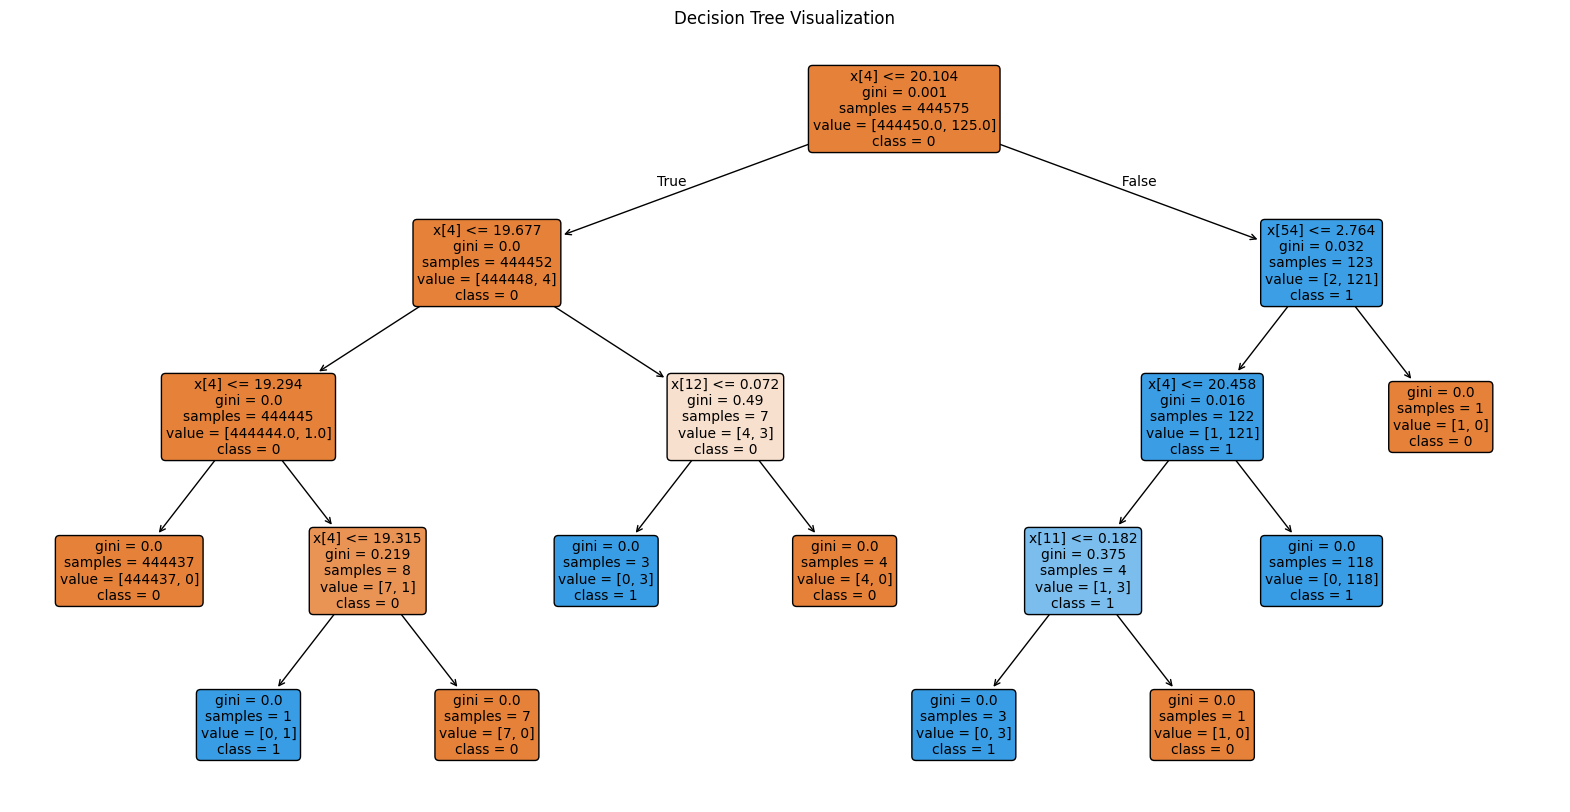

In [ ]:
# add visulizations 

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# visualization plot
plt.figure(figsize=(20, 10))  # Set figure size for clarity
plot_tree(
    dt_model,
    feature_names=X_train.columns if isinstance(X_train, pd.DataFrame) else None,
    class_names=[str(c) for c in dt_model.classes_],
    filled=True,  
    rounded=True,  
    fontsize=10,  
)
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:
# decision tree
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #fit data into dataset
X_test_scaled = scaler.transform(X_test)#transform the test data


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = DecisionTreeClassifier(random_state=42)#intialize the tree

clf.fit(X_train_scaled, y_train)#training the model

y_pred = clf.predict(X_test_scaled)# make predictions

accuracy = accuracy_score(y_test, y_pred) #accuracy 
conf_matrix = confusion_matrix(y_test, y_pred) # confusion matrix 
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)



Accuracy: 0.9999460159792701
Confusion Matrix:
 [[111108      2]
 [     4     30]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    111110
           1       0.94      0.88      0.91        34

    accuracy                           1.00    111144
   macro avg       0.97      0.94      0.95    111144
weighted avg       1.00      1.00      1.00    111144



In [ ]:
# K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# scaling  the data for KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train, y_train)

# making predictions
y_pred_knn = knn_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')  
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')


print("K-Nearest Neighbors Accuracy:", accuracy)
print("K-Nearest Neighbors Precision:", precision)
print("K-Nearest Neighbors Recall:", recall)
print("K-Nearest Neighbors F1 Score:", f1)

print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))



K-Nearest Neighbors Accuracy: 0.9968959188080329
K-Nearest Neighbors Precision: 0.9962921165016478
K-Nearest Neighbors Recall: 0.9968959188080329
K-Nearest Neighbors F1 Score: 0.9962924735472499

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.72      0.31      0.44       426

    accuracy                           1.00    111144
   macro avg       0.86      0.66      0.72    111144
weighted avg       1.00      1.00      1.00    111144

Confusion Matrix:
 [[110665     53]
 [   292    134]]


In [ ]:
# Logistic Regression


from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

lr=LogisticRegression()
lr.fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


cv_score = cross_val_score(lr, x_train, y_train, cv=5).mean()

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)


y_train=lr.predict(x_train)
y_test=lr.predict(x_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Cross-Validation Accuracy (mean):", cv_score)
print("Precision (Test Data):", precision)
print("Recall (Test Data):", recall)

Training Accuracy: 0.9999932519822302
Test Accuracy: 0.9999820053264233
Cross-Validation Accuracy (mean): 0.9999797559466908
Precision (Test Data): 1.0
Recall (Test Data): 0.9444444444444444


In [ ]:
# Logistic Regression


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import cross_val_score

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)

# Predict on the training and test data
y_train_pred = lr.predict(x_train_scaled)
y_test_pred = lr.predict(x_test_scaled)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Perform cross-validation
cv_score = cross_val_score(lr, x_train_scaled, y_train, cv=5).mean()

# Display the Classification Report for Test Data
class_report = classification_report(y_test, y_test_pred)

# Display metrics
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Cross-Validation Accuracy (mean):", cv_score)
print("Classification Report (Test Data):")
print(class_report)


Training Accuracy: 1.0
Test Accuracy: 1.0
Cross-Validation Accuracy (mean): 0.9999820052859473
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    111110
           1       1.00      1.00      1.00        34

    accuracy                           1.00    111144
   macro avg       1.00      1.00      1.00    111144
weighted avg       1.00      1.00      1.00    111144



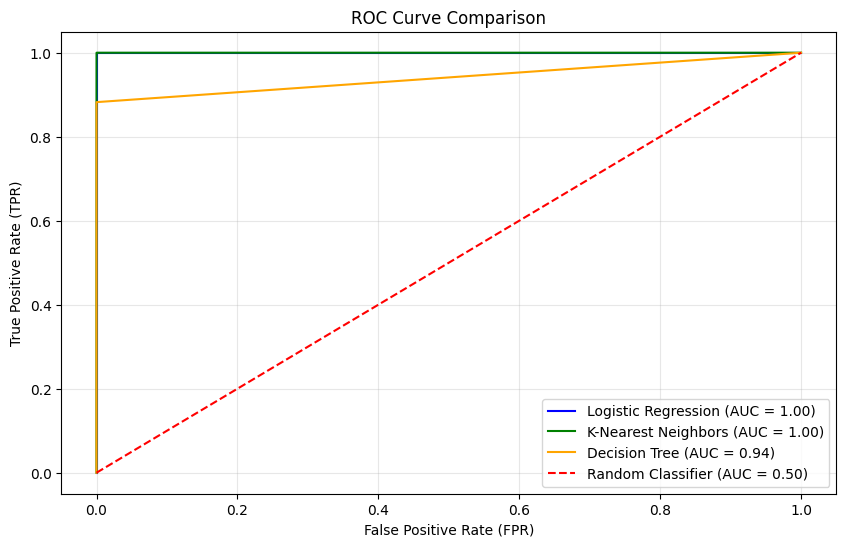

In [39]:
# comparing model viz. ROC curve 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
logistic_model = LogisticRegression()
knn_model = KNeighborsClassifier(n_neighbors=5)
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train models
logistic_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)
decision_tree_model.fit(X_train_scaled, y_train)

# Get predicted probabilities for the positive class
y_test_probs_lr = logistic_model.predict_proba(X_test_scaled)[:, 1]
y_test_probs_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
y_test_probs_dt = decision_tree_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curves and AUC scores
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_test_probs_lr)
auc_lr = roc_auc_score(y_test, y_test_probs_lr)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_test_probs_knn)
auc_knn = roc_auc_score(y_test, y_test_probs_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_probs_dt)
auc_dt = roc_auc_score(y_test, y_test_probs_dt)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})", color='blue')
plt.plot(fpr_knn, tpr_knn, label=f"K-Nearest Neighbors (AUC = {auc_knn:.2f})", color='green')
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})", color='orange')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Classifier (AUC = 0.50)")

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Apply hyper-parameter optimization (preferably using grid search)

In [32]:
# decision tree hyper-parameter

from sklearn.model_selection import GridSearchCV

# defening the parameter grid
param_grid_dt = {
'max_depth': [3, 5, 10, None],
'min_samples_split': [2, 10, 20],
'min_samples_leaf': [1, 5, 10]
}

dt_model = DecisionTreeClassifier(random_state=42) # intialize Decision Tree Classifier


# intialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train_scaled, y_train) # fitting grid search to the training data

# Train the Decision Tree with the best parameters on the full training data
best_dt_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_best = best_dt_model.predict(X_test_scaled)

# Best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameters found: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation accuracy: 0.9999865039644604


In [ ]:
# Logistical regression hyper-parameter

In [ ]:
#  K-Nearest Neighbors hyper-parameter

Select and justify the recommended model based on performance,
interpretability, efficiency, etc

Analyze model results, demonstrate relationships between features
and the target variable, and recommend actions based on your find-
ings